In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Ryzen\\Desktop\\DataSet\\Data Analyst\\IV_Метрики_Гипотезы_Точки_Роста\\Финальная работа\\My_Data_Sample_(AIC)_Online_Retail.csv', sep = ",")


In [3]:
# переведем для порядка цену к integer
df['UnitPrice'] = [x.replace(',', '.') for x in df['UnitPrice']]
df['UnitPrice'] = df['UnitPrice'].astype(float)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom


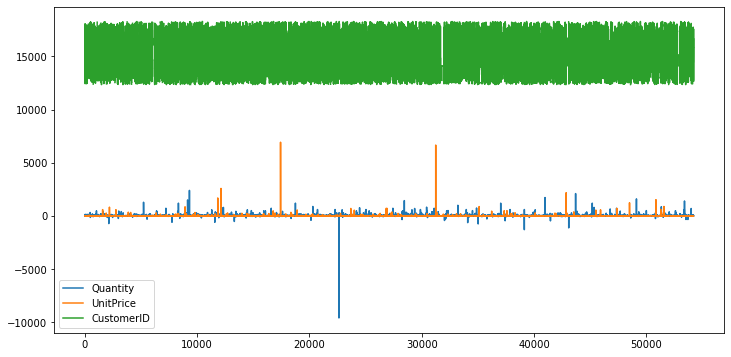

In [5]:
df.plot(figsize=(12,6))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  float64
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.3+ MB


In [7]:
len(set(df['Description']))

3402

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,54214.000000,54214.000000,40643.000000
mean,9.610802,4.307341,15283.422803
std,57.358422,47.834496,1707.982278
min,-9600.000000,0.000000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16775.000000
max,2400.000000,6930.000000,18287.000000


In [9]:
# Гипотезы по исследованию:
# 1.ссумирование продаж По странам
# 2.как покупает StockCode код акции
# 3.распределение по StockCode
# 4.Оптовики Quantity
# 5.В какие часы|месяцы делаются основные продажи InvoiceDate
# 6.В какие часы провал продаж
# 7.Хиты в Description
# 8.все книги, например 2 PICTURE BOOK EGGS EASTER BUNNY

In [10]:
df.groupby(['Description']).count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,5,5,5,5,5,4,5
50'S CHRISTMAS GIFT BAG LARGE,14,14,14,14,14,12,14
DOLLY GIRL BEAKER,18,18,18,18,18,15,18
I LOVE LONDON MINI BACKPACK,15,15,15,15,15,11,15
I LOVE LONDON MINI RUCKSACK,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
wet/rusty,1,1,1,1,1,0,1
wrong barcode (22467),1,1,1,1,1,0,1
wrong code?,1,1,1,1,1,0,1


In [11]:
# 4.Оптовики CustomerID

In [12]:
group_CustomerID = df.groupby(['CustomerID'])
g_CustomerID=group_CustomerID.CustomerID.count()
g_CustomerID.head()

CustomerID
12347.0    15
12348.0     2
12349.0     7
12350.0     3
12352.0     8
Name: CustomerID, dtype: int64

In [13]:
# 10 основных оптовых покупателей
new_dict_CustomerID = {}
for k, v in g_CustomerID.items():
    new_dict_CustomerID[v] = k
hits_CustomerID = sorted(new_dict_CustomerID.items(), reverse=True)
hits_CustomerID[:10]

[(771, 17841.0),
 (563, 14911.0),
 (546, 14096.0),
 (447, 12748.0),
 (278, 14606.0),
 (255, 15311.0),
 (195, 14646.0),
 (180, 13089.0),
 (166, 13263.0),
 (160, 14298.0)]

In [14]:
# 2.как покупает StockCode код акции

In [15]:
group_StockCode = df.groupby(['StockCode'])
g_StockCode=group_StockCode.StockCode.count()
g_StockCode.head()

StockCode
10002     5
10080     2
10120     1
10124A    2
10125     7
Name: StockCode, dtype: int64

In [16]:
# 10 акций-хитов и объемы продаж
new_dict_StockCode = {}
for k, v in g_StockCode.items():
    new_dict_StockCode[v] = k
hits_StockCode = sorted(new_dict_StockCode.items(), reverse=True)
hits_StockCode[:10]

[(237, '85123A'),
 (222, '85099B'),
 (204, '22423'),
 (175, '20725'),
 (164, '21212'),
 (162, '47566'),
 (149, '20727'),
 (141, '22386'),
 (140, '22720'),
 (138, '84879')]

In [17]:
# продажи в странах

In [18]:
group_Country = df.groupby(['Country'])
g_Country=group_Country.Country.count()
g_Country.head()

Country
Australia    130
Austria       48
Bahrain        1
Belgium      211
Brazil         3
Name: Country, dtype: int64

In [19]:
# 10 хитов продаж по странам
new_dict_Country = {}
for k, v in g_Country.items():
    new_dict_Country[v] = k
hits_Country = sorted(new_dict_Country.items(), reverse=True)
hits_Country[:10]

[(49602, 'United Kingdom'),
 (951, 'Germany'),
 (881, 'France'),
 (787, 'EIRE'),
 (253, 'Spain'),
 (234, 'Netherlands'),
 (211, 'Belgium'),
 (189, 'Switzerland'),
 (152, 'Portugal'),
 (130, 'Australia')]

In [20]:
# 7.Хиты-продукты в Description

In [21]:
group_Description = df.groupby(['Description'])
g_Description=group_Description.Description.count()
g_Description.head()

Description
 4 PURPLE FLOCK DINNER CANDLES     5
 50'S CHRISTMAS GIFT BAG LARGE    14
 DOLLY GIRL BEAKER                18
 I LOVE LONDON MINI BACKPACK      15
 I LOVE LONDON MINI RUCKSACK       1
Name: Description, dtype: int64

In [22]:
# 10 хитов продаж по названию
new_dict_Description = {}
for k, v in g_Description.items():
    new_dict_Description[v] = k
hits_Description = sorted(new_dict_Description.items(), reverse=True)
hits_Description[:10]

[(243, 'WHITE HANGING HEART T-LIGHT HOLDER'),
 (222, 'JUMBO BAG RED RETROSPOT'),
 (204, 'REGENCY CAKESTAND 3 TIER'),
 (175, 'LUNCH BAG RED RETROSPOT'),
 (164, 'PACK OF 72 RETROSPOT CAKE CASES'),
 (162, 'PARTY BUNTING'),
 (149, 'LUNCH BAG  BLACK SKULL.'),
 (141, 'JUMBO BAG PINK POLKADOT'),
 (140, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
 (138, 'NATURAL SLATE HEART CHALKBOARD ')]